<a href="https://colab.research.google.com/github/4rdnac/Machine-Learning_2025/blob/main/UTS_2341720187_CANDRA_AHMAD_DANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library & Install Library

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551515 sha256=674549f80da90cd5ba801ab3e1750e15c5379690eba14ca24bffd620acbf9957
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import random
from google.colab import drive

#2. Baca Dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/heart.csv')
print("=== Dataset Preview ===")
display(df.head())


=== Dataset Preview ===


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 3. Preprocessing Data

In [22]:
# Baca dataset
data = pd.read_csv('/content/drive/MyDrive/MachineLearning/heart.csv')

# Pilih kolom numerik untuk clustering
X = data.select_dtypes(include=['float64', 'int64'])

# Standarisasi data agar semua fitur memiliki skala yang sama
scaler = StandardScaler()
X_processed = scaler.fit_transform(X)

nominal_column = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=nominal_column, drop_first=True)

# 4. Membuat Fitur CholAge

In [19]:
if 'chol' in df.columns and 'age' in df.columns:
    df['CholAge'] = df['chol'] * df['age']
    print("\nFitur baru 'CholAge' berhasil dibuat.")
else:
    print("\nKolom 'chol' dan 'age' tidak ditemukan, fitur baru tidak dibuat.")


Fitur baru 'CholAge' berhasil dibuat.


#5. Normalisasi

In [39]:
# Melakukan normalisasi selain kolom one-hot
encoded_prefixes = tuple(nominal_column)
numeric_columns = [col for col in df.columns if not col.startswith(encoded_prefixes)]

# inisialisasi scaler
scaler = StandardScaler()

X_scaled = df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 6. Clustering
# K-means

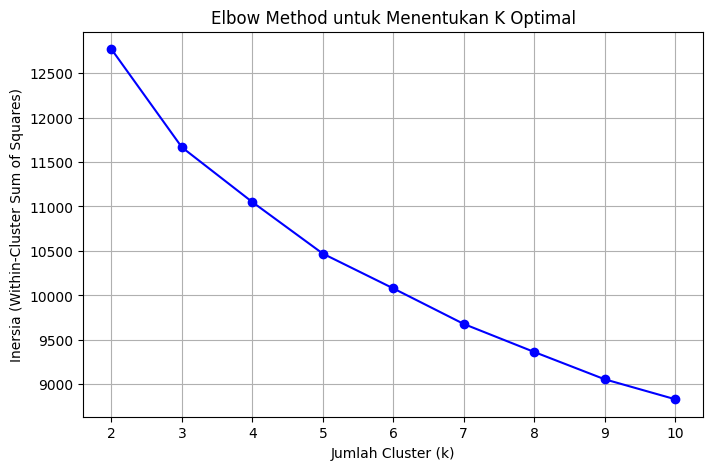

In [40]:
# Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # gunakan X_scaled hasil normalisasi
    inertia.append(kmeans.inertia_)

# Membuat plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o', color='b')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inersia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


In [41]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_processed)

# Menghitung Silhouette Score untuk K-Means
kmeans_silhouette = silhouette_score(X_processed, kmeans_labels)

# Menghitung Davies Bouldin Score untuk DBSCAN
kmeans_davies_bouldin = davies_bouldin_score(X_processed, kmeans_labels)

print(f"\nSilhouette Score (KMeans): {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Score (KMeans): {kmeans_davies_bouldin:.4f}")


Silhouette Score (KMeans): 0.1421
Davies-Bouldin Score (KMeans): 2.0948


# DBScan

In [42]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_processed)

# Cek jumlah cluster (tidak termasuk noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Jumlah cluster (tidak termasuk noise): {n_clusters}")

# Hitung metrik evaluasi (jika cluster lebih dari 1)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(X_processed, dbscan_labels)
    dbscan_davies_bouldin = davies_bouldin_score(X_processed, dbscan_labels)

    print(f"\nSilhouette Score (DBSCAN): {dbscan_silhouette:.4f}")
    print(f"Davies-Bouldin Score (DBSCAN): {dbscan_davies_bouldin:.4f}")
else:
    print("\nDBSCAN hanya menghasilkan 1 cluster atau seluruh data dianggap noise — metrik tidak dapat dihitung.")

Jumlah cluster (tidak termasuk noise): 16

Silhouette Score (DBSCAN): -0.1861
Davies-Bouldin Score (DBSCAN): 1.3974


# 7. Visualisasi


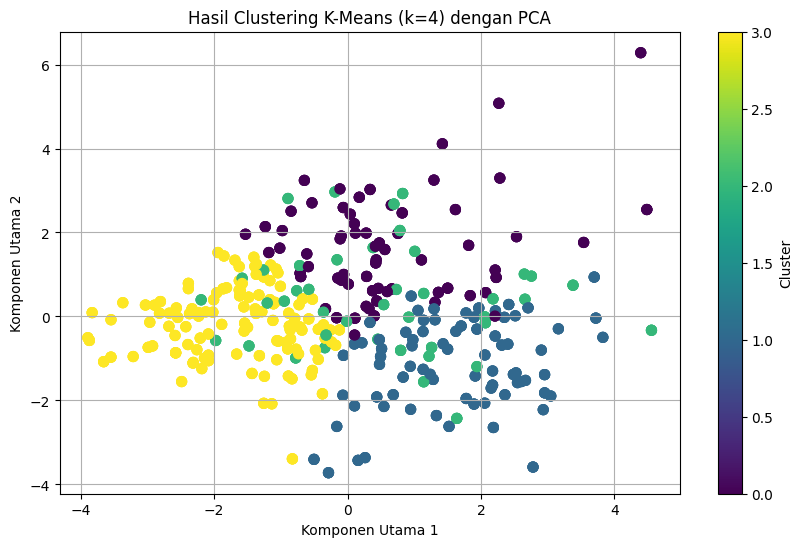

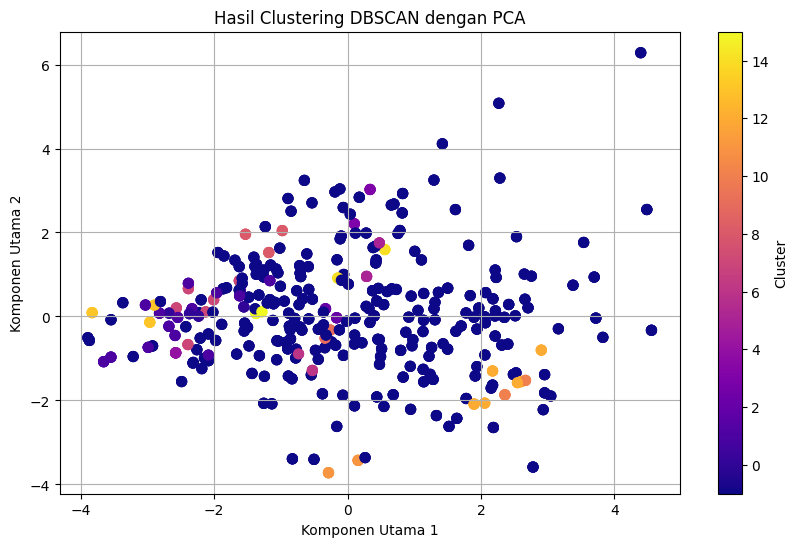

In [43]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Buat DataFrame hasil PCA dan label clustering
df_results = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'kmeans_cluster': kmeans_labels,
    'dbscan_cluster': dbscan_labels
})

# Visualisasi K-Means

plt.figure(figsize=(10, 6))
plt.scatter(df_results['PCA1'], df_results['PCA2'],
            c=df_results['kmeans_cluster'], cmap='viridis',
            marker='o', s=50)
plt.title(f'Hasil Clustering K-Means (k={k_optimal}) dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
plt.close()

# Visualisasi DBSCAN

plt.figure(figsize=(10, 6))
plt.scatter(df_results['PCA1'], df_results['PCA2'],
            c=df_results['dbscan_cluster'], cmap='plasma',
            marker='o', s=50)
plt.title('Hasil Clustering DBSCAN dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
plt.close()

# 8. Annoy Index untuk Nearest Neighbor Search

In [44]:
from annoy import AnnoyIndex
import time
import numpy as np

# Konversi data PCA ke float32 (syarat Annoy)
X = X_pca.astype('float32')

# Tentukan jumlah dimensi PCA
f = X.shape[1]
t = AnnoyIndex(f, 'euclidean')

# Tambahkan semua vektor ke indeks Annoy
for i, vec in enumerate(X):
    t.add_item(i, vec)

# Bangun pohon Annoy (10 tree untuk keseimbangan antara akurasi dan kecepatan)
t.build(10)

# Pilih satu titik acak untuk pencarian tetangga terdekat
query_idx = 42
query = X[query_idx]

# Hitung waktu pencarian
start = time.time()
neighbors = t.get_nns_by_vector(query, 5)  # ambil 5 tetangga terdekat
time_annoy = (time.time() - start) * 1000  # waktu dalam ms

# Hitung jarak aktual tiap tetangga terhadap query
distances = [np.linalg.norm(X[n] - query) for n in neighbors]

# Cetak hasil
print(f"Query Point Index: {query_idx}")
print(f"Cluster (KMeans) Query Point: {kmeans_labels[query_idx]}")
print(f"Waktu pencarian Annoy: {time_annoy:.4f} ms\n")

print("Nearest Neighbors and Distances:")
for n, d in zip(neighbors, distances):
    print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {kmeans_labels[n]}")


Query Point Index: 42
Cluster (KMeans) Query Point: 0
Waktu pencarian Annoy: 0.1276 ms

Nearest Neighbors and Distances:
Neighbor Index: 42 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 670 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 759 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 924 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 720 | Distance: 0.2458 | Cluster (KMeans): 0


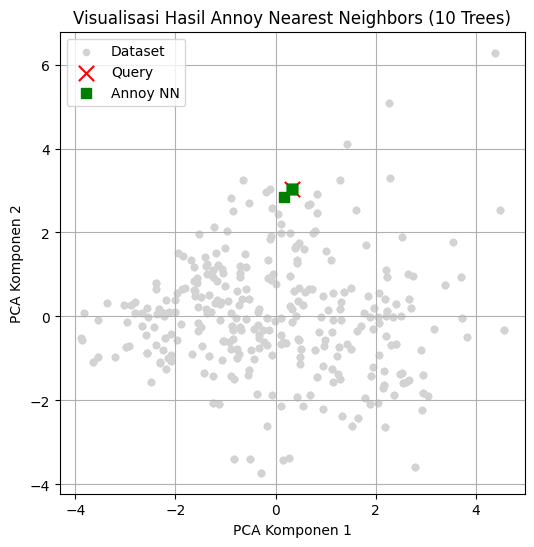

In [45]:
# --- Visualisasi hasil Annoy ---
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")          # seluruh dataset
plt.scatter(query[0], query[1], c="red", marker="x", s=120, label="Query")   # titik query
plt.scatter(X[neighbors, 0], X[neighbors, 1], c="green", s=60, marker="s", label="Annoy NN")  # tetangga terdekat

plt.legend()
plt.title("Visualisasi Hasil Annoy Nearest Neighbors (10 Trees)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.grid(True)
plt.show()
plt.close()

# Kesimpulan
1. Dataset ini berisi 303 sampel dengan 14 fitur yang terdiri dari kombinasi numerik dan kategorikal. Fitur-fitur tersebut meliputi informasi medis pasien seperti usia (age), jenis kelamin (sex), tekanan darah istirahat (trestbps), kolesterol (chol), detak jantung maksimum (thalach), serta variabel indikator seperti nyeri dada (cp), gula darah tinggi (fbs), dan hasil pemeriksaan EKG (restecg).
Sebagian besar kolom bertipe numerik (int64 dan float64), sedangkan kolom kategorikal seperti cp, slope, thal, dan ca dapat diubah menjadi one-hot encoding untuk keperluan analisis clustering. Dataset ini cocok digunakan untuk mengelompokkan pasien berdasarkan karakteristik kesehatan jantungnya.
2. * K-Means menghasilkan Silhouette Score 0.1421, yang menunjukkan pemisahan antar kluster masih kurang jelas.

    * Davies-Bouldin Score untuk K-Means sebesar 2.0948, menandakan kualitas kluster masih lemah.

    * DBSCAN membentuk 16 kluster tanpa noise dengan Silhouette Score -0.1861, yang menunjukkan hasil klustering tidak stabil.

    * Davies-Bouldin Score DBSCAN sebesar 1.3974, sedikit lebih baik dibanding K-Means namun tetap menunjukkan pemisahan data yang belum optimal.
3. Hasil query Annoy menunjukkan bahwa titik dengan index 42 berada pada cluster 0 berdasarkan hasil klasterisasi K-Means. Lima tetangga terdekat yang ditemukan Annoy (index 42, 670, 759, 924, dan 720) juga berada dalam cluster yang sama, yaitu cluster 0. Jarak antar titik yang sangat kecil, bahkan beberapa bernilai nol, menunjukkan bahwa tetangga tersebut memiliki kemiripan yang sangat tinggi dengan titik query. Hal ini membuktikan bahwa hasil pencarian Annoy konsisten dengan hasil klasterisasi K-Means, di mana tetangga terdekat cenderung berada dalam kluster yang sama.
